In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dataset.head(3)
dataset = pd.read_csv(r"./data/loan2.csv")


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [142]:
dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

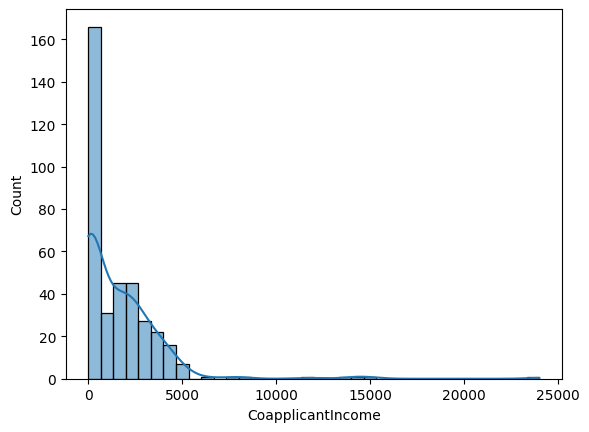

In [143]:
sns.histplot(dataset["CoapplicantIncome"], kde=True)
plt.show()

In [144]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)

iqr = q3-q1

min_range = q1 - (1.5*iqr)
max_range = q3 + (1.5*iqr)
print(min_range , max_range)

-3645.75 6076.25


In [145]:
dataset_no_outlier = dataset[(dataset["CoapplicantIncome"] >= min_range) & (dataset["CoapplicantIncome"] <= max_range )]

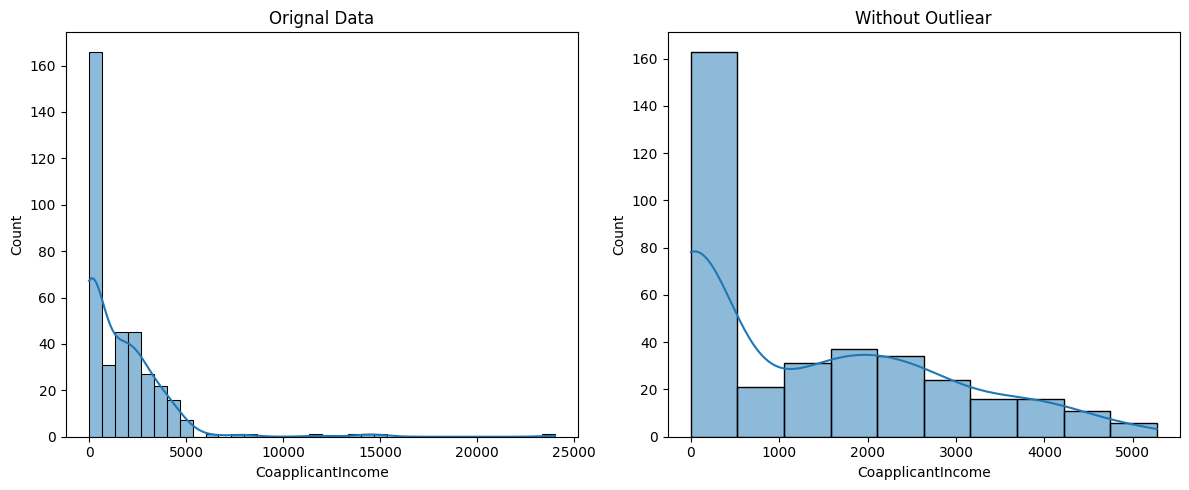

In [146]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot( dataset["CoapplicantIncome"] , kde= True)
plt.title("Orignal Data")

plt.subplot(1,2,2)
sns.histplot(dataset_no_outlier["CoapplicantIncome"], kde=True)
plt.title("Without Outliear")

plt.tight_layout()
plt.show()

Function Transformatin

In [147]:
from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer(np.log1p)

In [148]:

dataset_no_outlier["CoapplicantIncome_tf"]= ft.fit_transform(dataset_no_outlier[["CoapplicantIncome"]])

C:\Users\bhard\AppData\Local\Temp\ipykernel_25300\2995162813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_outlier["CoapplicantIncome_tf"]= ft.fit_transform(dataset_no_outlier[["CoapplicantIncome"]])


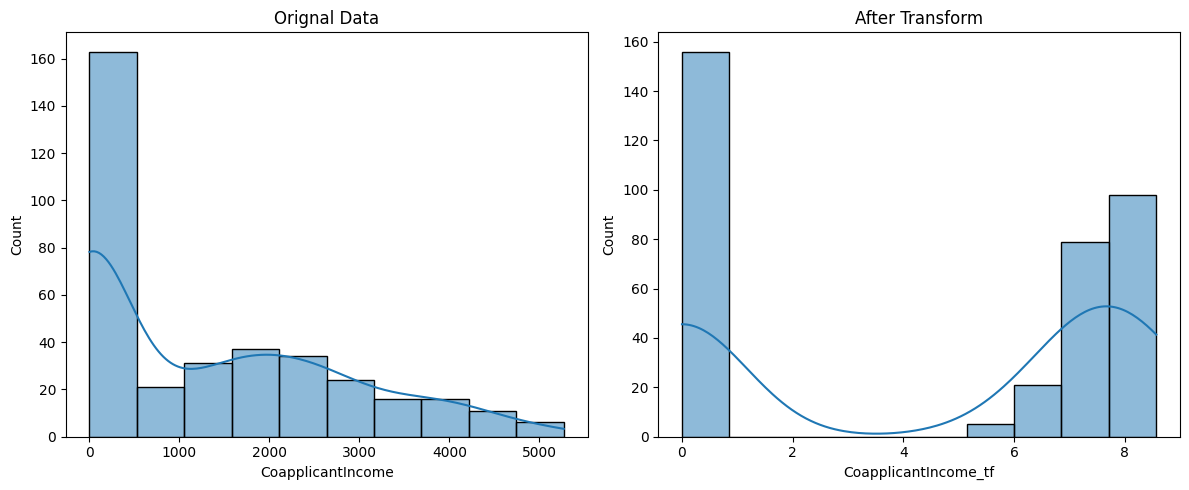

In [149]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot( dataset_no_outlier["CoapplicantIncome"] , kde= True)
plt.title("Orignal Data")

plt.subplot(1,2,2)
sns.histplot(dataset_no_outlier["CoapplicantIncome_tf"], kde=True)
plt.title("After Transform")

plt.tight_layout()
plt.show()